/home/nlubalo/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


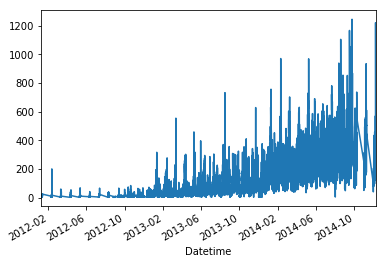

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import lag_plot
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


#loadng training data
Train_data=pd.read_csv("Train.csv")


Train_data.shape
type(Train_data)

Train_data['Count'].value_counts(dropna=False)
Train_data['Count'].describe()
Train_data.head()
Train_data.tail()
Train_data['Datetime'].head().describe

#setting the date as the index column
Train_data=Train_data.set_index('Datetime')

#convert the index column to type datetime
Train_data.index = pd.to_datetime(Train_data.index)

#plot the initial data
Train_data['Count'].plot()









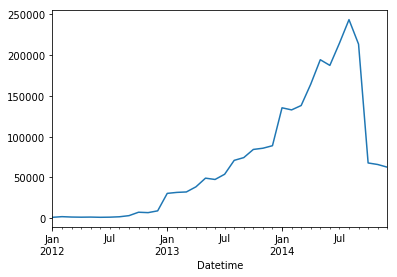

In [8]:
#RESAMPLE DATA TO MONTHLY TO IDENTIFY A TREND (method 1)

Daily_Summary=pd.DataFrame()
#resample
Daily_Summary['Count']= Train_data.Count.resample('M').sum()
#plotting the resampled data
Daily_Summary['Count'].plot()




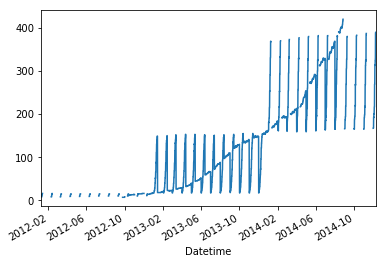

In [104]:
#TIME SERIES DECOMPOSITION( method 2)

#Our data is stored with 1hr/60min resolution and I want to see a monthly seasonality, so our `freq` is

decompfreq = 24*60/60*60

decomposition = sm.tsa.seasonal_decompose(Train_data.Count, freq= decompfreq) 
#fig=decomposition.plot()
trend = decomposition.trend
trend.plot()
#trend.set_size_inches(15, 10)

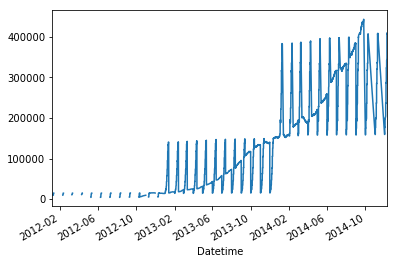

In [6]:
#MOVING AVERAGES/ROLLING MEAN (method 3)
rolling = Train_data.Count.rolling(window=1000).sum()

rolling.plot()



In [39]:
#Our data set set has defined trend and seasonality and therefore its definetly not stationary
#To check and confirm this stationary, I used Dickey-Fuller test

#Ho = The time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
#H1 = The time series does not have a unit root, meaning it is stationary.
result = adfuller(Train_data['Count'])

print('ADF Test Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

#our pvalue is less than 0.05 hence we reject the null hypothesis
#also our test statistics is much less than our critical values so the null hypothesis is rejected ie. Time series 
  #is stationary

ADF Test Statistic: -4.456561
p-value: 0.000235
Critical Values:
	5%: -2.862
	1%: -3.431
	10%: -2.567
